In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
# 경로 설정
train_dir = 'C:\\Users\\intel\\Downloads\\trainset(300x300)'
test_dir = 'C:\\Users\\intel\\Downloads\\testset(300x300)'

# ImageDataGenerator 설정 (데이터 증강 없이 단순 스케일링만 적용, validation_split 포함)
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# 훈련용 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse',
    subset='training',      # 훈련용 데이터
    shuffle=True
)

# 검증용 데이터 생성기
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse',
    subset='validation',    # 검증용 데이터
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse',
    shuffle=False             # 테스트 데이터는 셔플하지 않음
)

Found 4381 images belonging to 10 classes.
Found 482 images belonging to 10 classes.
Found 1211 images belonging to 10 classes.


In [3]:
# 간단한 모델 생성
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # 100개의 클래스로 분류
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 모델 학습
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator
)

Epoch 1/10
137/137 [==============================] - 45s 312ms/step - loss: 5.6296 - accuracy: 0.1746 - val_loss: 2.0719 - val_accuracy: 0.2531
Epoch 2/10
137/137 [==============================] - 16s 115ms/step - loss: 2.0477 - accuracy: 0.2219 - val_loss: 2.0527 - val_accuracy: 0.2801
Epoch 3/10
137/137 [==============================] - 17s 121ms/step - loss: 1.9861 - accuracy: 0.2634 - val_loss: 1.9967 - val_accuracy: 0.2469
Epoch 4/10
137/137 [==============================] - 16s 117ms/step - loss: 1.8668 - accuracy: 0.3063 - val_loss: 2.0320 - val_accuracy: 0.2490
Epoch 5/10
137/137 [==============================] - 16s 119ms/step - loss: 1.7657 - accuracy: 0.3401 - val_loss: 1.9642 - val_accuracy: 0.3029
Epoch 6/10
137/137 [==============================] - 18s 130ms/step - loss: 1.6867 - accuracy: 0.3618 - val_loss: 2.0029 - val_accuracy: 0.3320
Epoch 7/10
137/137 [==============================] - 18s 130ms/step - loss: 1.6242 - accuracy: 0.3890 - val_loss: 2.0165 - val_ac

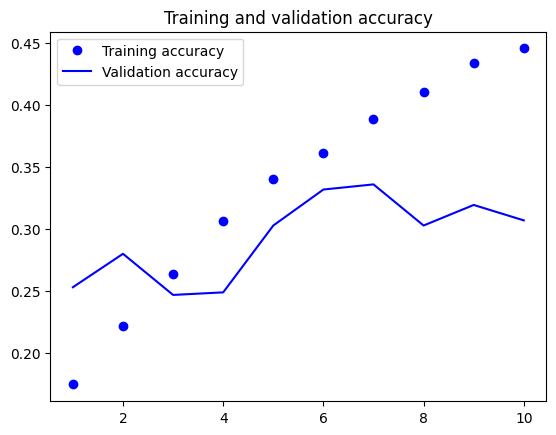

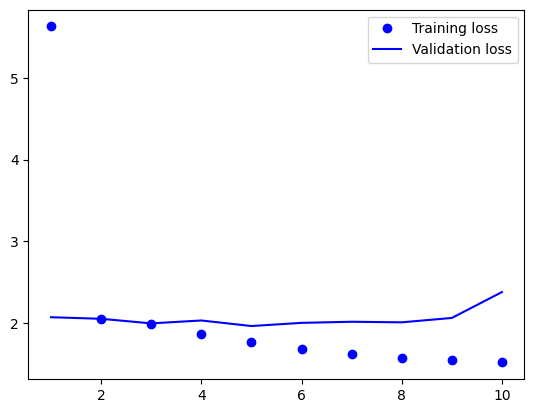

In [5]:
# 시각화
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.legend()
plt.show()

In [6]:
# 테스트 세트에 대한 모델 평가
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

38/38 [==============================] - 10s 271ms/step - loss: 2.4379 - accuracy: 0.2700
Test Loss: 2.437897205352783
Test Accuracy: 0.27002477645874023


In [ ]:
model.save("naive2DCNN.h5")

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
cnnmodel = load_model("naive2DCNN.h5")

In [ ]:
# 테스트 세트에 대한 모델 평가
test_loss, test_accuracy = cnnmodel.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")